# **MAJOR project PUBG DATA analysis**


# Description of dataset
Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink.

PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game of all time, and has millions of active monthly players.

The team at PUBG has made official game data available for the public to explore and scavenge outside of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made possible through the PUBG Developer API.

You are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings.

What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do you need to be the top shot? Let's let the data do the talking!

Taken from https://www.kaggle.com/c/pubg-finish-placement-prediction/data

## **Problem statements**:
- We have to create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place).
- **winPlacePerc** column is the target variable

## Data fields
- **DBNOs** - Number of enemy players knocked.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **Id** - Player’s Id
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **kills** - Number of enemy players killed.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration** - Duration of match in seconds.
- **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
- **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups** - Number of groups we have data for in the match.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


In [1]:
# Importing the required libraries  for this  project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline


## Reducing the size of dataset 
- First reduce the size of dataset 
- Use Reduce Memory Usage function
- Code is available at https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [2]:


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
# Now Load the data
train = pd.read_csv('train_V2.csv')
train = reduce_mem_usage(train) # we can use the above function to the train

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 498.81 MB
Decreased by 49.3%


In [4]:
test = pd.read_csv('test_V2.csv')# we can use the above function to the test
test = reduce_mem_usage(test)

Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 225.31 MB
Decreased by 45.5%


In [5]:
# dataframe.info() shows the details of dataset  like Total entries, Column name and Column data type.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Id               category
 1   groupId          category
 2   matchId          category
 3   assists          int8    
 4   boosts           int8    
 5   damageDealt      float16 
 6   DBNOs            int8    
 7   headshotKills    int8    
 8   heals            int8    
 9   killPlace        int8    
 10  killPoints       int16   
 11  kills            int8    
 12  killStreaks      int8    
 13  longestKill      float16 
 14  matchDuration    int16   
 15  matchType        category
 16  maxPlace         int8    
 17  numGroups        int8    
 18  rankPoints       int16   
 19  revives          int8    
 20  rideDistance     float16 
 21  roadKills        int8    
 22  swimDistance     float16 
 23  teamKills        int8    
 24  vehicleDestroys  int8    
 25  walkDistance     float16 
 26  weaponsAcquire

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Id               category
 1   groupId          category
 2   matchId          category
 3   assists          int8    
 4   boosts           int8    
 5   damageDealt      float16 
 6   DBNOs            int8    
 7   headshotKills    int8    
 8   heals            int8    
 9   killPlace        int8    
 10  killPoints       int16   
 11  kills            int8    
 12  killStreaks      int8    
 13  longestKill      float16 
 14  matchDuration    int16   
 15  matchType        category
 16  maxPlace         int8    
 17  numGroups        int8    
 18  rankPoints       int16   
 19  revives          int8    
 20  rideDistance     float16 
 21  roadKills        int8    
 22  swimDistance     float16 
 23  teamKills        int8    
 24  vehicleDestroys  int8    
 25  walkDistance     float16 
 26  weaponsAcquire

In [6]:
train.head() # Looking at first five train data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [7]:
train.tail() # Looking at last five Train data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,...,0,1292.0,0,0.000000,0,0,1019.0000,3,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,...,0,0.0,0,0.000000,0,0,81.6875,6,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,...,0,0.0,0,2.183594,0,0,788.5000,4,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,...,2,0.0,0,0.000000,0,0,2748.0000,8,0,0.799805
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00000,0,0,1,18,...,0,1369.0,0,0.000000,0,0,1244.0000,5,0,0.546387


In [9]:
test.head() # Looking at first five test data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46875,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.12500,0,0,2,11,...,1503,2,4668.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40625,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,788.0,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.50000,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.25000,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2964.0,4,0


In [8]:
# Let see the number of rows and columns in test and train dataset
print("Number of rows in Training Dataset :  ",train.shape[0])
print('---------------------------------------------------')
print("Number of columns in Training Dataset :  ",train.shape[1])
print('---------------------------------------------------')
print("Number of rows in Test Dataset :  ",test.shape[0])
print('---------------------------------------------------')
print("Number of columns in Test Dataset :  ",test.shape[1])


Number of rows in Training Dataset :   4446966
---------------------------------------------------
Number of columns in Training Dataset :   29
---------------------------------------------------
Number of rows in Test Dataset :   1934174
---------------------------------------------------
Number of columns in Test Dataset :   28


In [9]:
## Identifying the features or columns
#checking the features in the Datasets
print("\nFeatures in the datasets :",)

print("\nTraining Dataset : \n", list(train.columns))

print("\nTest Dataset : \n",list(test.columns))


Features in the datasets :

Training Dataset : 
 ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']

Test Dataset : 
 ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']


# Tasks to be performed:
## **Part 1 :** Exploratory Data Analysis
## **Part 2 :** Data Cleaning: Outlier Detection and Removal - Finding the fraudsters
## **Part 3 :** Feature Selection
## **Part 4 :** Final Predition


## **Part 1 :** Exploratory Data Analysis (EDA)
- Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
- EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them.

## Handling Missing **Values**

### To see null values :
To observe that if the data set has any null value we use <strong>isnull()</strong> method .
- If any value is zero or NaN or Na then it will return <strong>True</strong> otherwise <strong>False.</strong>

In [10]:
train.isnull()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4446962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4446963,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4446964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


To see whether which column is null values or not we use <strong>isnull().sum()</strong> method.
If we want to sort the values based on column we use <strong>sort_values()</strong> method.

In [12]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


Since in the **winPlacePerc** column Contain 1 missing value .So we have to remove that missing value.


In [13]:
# It means there is one row in the dataset which have one missing value
train[train['winPlacePerc'].isnull()]
# It return one row which contain null value in winPlacePerc column. 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [14]:
# We will drop the missing value from the dataset if any column has using dropna
train_new = train.dropna(axis=0) 
train_new.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

- The **describe()** method is used for calculating some statistical data like percentile, mean and std of the numerical values of the DataFrame.
- When  we use describe() it only consider those columns or features whose datatype is integer.

In [15]:

train_new.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4446965.00,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4446965.0,4.446965e+06,4.446965e+06,4446965.000,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,NaN,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,1.646590e-01,NaN,3.496092e-03,NaN,2.386841e-02,7.918209e-03,NaN,3.660488e+00,6.064603e+02,NaN
std,5.885731e-01,1.715794e+00,NaN,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,NaN,7.337297e-02,NaN,1.673935e-01,9.261158e-02,NaN,2.456543e+00,7.397005e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,155.125,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.25,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,685.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,2.000000e+00,186.00,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910400e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1976.000,5.000000e+00,1.495000e+03,7.407227e-01
max,2.200000e+01,3.300000e+01,6616.00,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.070400e+04,1.800000e+01,3824.0,1.200000e+01,5.000000e+00,25776.000,2.360000e+02,2.013000e+03,1.000000e+00


In [18]:
test.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
count,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,...,1.934174e+06,1.934174e+06,1.934174e+06,1.934174e+06,1934174.0,1.934174e+06,1.934174e+06,1934174.000,1.934174e+06,1.934174e+06
mean,2.299524e-01,1.104360e+00,NaN,6.541500e-01,2.258147e-01,1.357999e+00,4.781403e+01,5.094502e+02,9.183569e-01,5.435855e-01,...,8.873689e+02,1.630189e-01,NaN,3.408690e-03,NaN,2.335829e-02,7.680798e-03,NaN,3.627590e+00,6.113582e+02
std,5.785920e-01,1.713828e+00,NaN,1.133690e+00,5.933918e-01,2.665694e+00,2.746275e+01,6.288322e+02,1.523761e+00,7.090114e-01,...,7.378231e+02,4.682340e-01,NaN,7.298342e-02,NaN,1.650875e-01,9.149580e-02,NaN,2.359042e+00,7.406629e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,154.125,2.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.418750e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.442000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,679.500,3.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.853750e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.175000e+03,1.000000e+00,1.000000e+00,...,1.500000e+03,0.000000e+00,6.301880e-03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1970.000,5.000000e+00,1.495000e+03
max,2.700000e+01,2.400000e+01,6.228000e+03,5.900000e+01,4.100000e+01,7.500000e+01,1.000000e+02,2.174000e+03,5.800000e+01,1.500000e+01,...,5.742000e+03,2.000000e+01,4.070400e+04,1.500000e+01,3272.0,9.000000e+00,5.000000e+00,14912.000,1.530000e+02,2.000000e+03


First we know the number of unique values in the dataset.
- We can use <strong>nunique()</strong> method.

In [16]:
train_new.nunique().sort_values()

vehicleDestroys          6
teamKills               11
roadKills               14
matchType               16
killStreaks             18
assists                 20
revives                 25
boosts                  27
headshotKills           34
DBNOs                   39
kills                   58
heals                   63
weaponsAcquired         97
maxPlace                99
numGroups              100
killPlace              101
matchDuration         1266
winPoints             1447
killPoints            1707
rankPoints            2262
winPlacePerc          2268
longestKill          11155
swimDistance         12589
damageDealt          12925
rideDistance         15734
walkDistance         15940
matchId              47964
groupId            2026744
Id                 4446965
dtype: int64

In [17]:
for i in ['matchId','groupId','Id','matchDuration']:
  print(f"unique[{i}] count: ",train_new[i].nunique())

unique[matchId] count:  47964
unique[groupId] count:  2026744
unique[Id] count:  4446965
unique[matchDuration] count:  1266


- In the given dataset there are many matches are played and different group of player are there.The winning  percentage is not calculated based on the `ID(Player id)` or `matchID` or `groupId`or `matchDuration`. 
- These id are generated every time when new game is started.
- It is possible that one player can have more than one groupid or matchid or id in the different game. So we consider these column as **Unnecessary Column or Unnecessary featuers**

In [18]:
#  'matchid','groupid','id',`matchDuration` are not used for predicting the 'winPlacePerc ' so we can drop it from test and train .
train_new1 = train_new.drop(['matchId','groupId','Id','matchDuration'],axis=1)
test_new = test.drop(['matchId','groupId','Id','matchDuration'],axis=1)
print('DROPPED THE Unnecessary Columns : `matchId`,`groupId`,`Id`,`matchDuration` from Train and Test dataset')
print('Successfully Dropped !!!')

DROPPED THE Unnecessary Columns : `matchId`,`groupId`,`Id`,`matchDuration` from Train and Test dataset
Successfully Dropped !!!


In [19]:
# Now again check the number of features or  columns in test and train dataset

print("Number of columns or features in Training Dataset :  ",train_new1.shape[1])
print('---------------------------------------------------')

print("Number of columns or features in Test Dataset :  ",test_new.shape[1])


Number of columns or features in Training Dataset :   25
---------------------------------------------------
Number of columns or features in Test Dataset :   24


# **Correlation Analysis** :
- **Correlation** is a statistic that measures the degree to which two variables move in relation to each other.
- `Pandas` also have `corr()` method to see the correlation between the two or more sets of data.
- Its values is ranges from `-1 to +1`.
- In this we will check the relationship between the variable or features using seaborn heatmap .
- It is also called `Multivariate graphical`.

**Multivariate graphical :**
- It is types of EDA.
- Multivariate data uses graphics to display relationships between two or more sets of data. 
- The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.


In [20]:

train_new1.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299439
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107992,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634232
damageDealt,0.406726,0.521947,1.000000,0.735762,0.613409,0.342987,-0.677398,0.049904,0.888784,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440506
DBNOs,0.301057,0.358907,0.735762,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102536,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279968
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076494,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079586,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427856
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012909
kills,0.319690,0.502024,0.888784,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,...,0.253323,0.114749,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419915
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


- From the above result of corr() method we can see that there are values between `-1 and 1`.
- As we see that there are some `-ve` and `+ve` value .
- The more the `positive value` the more is the relation between the two variables.
- The more the negative value, there is no relation between the two variables.


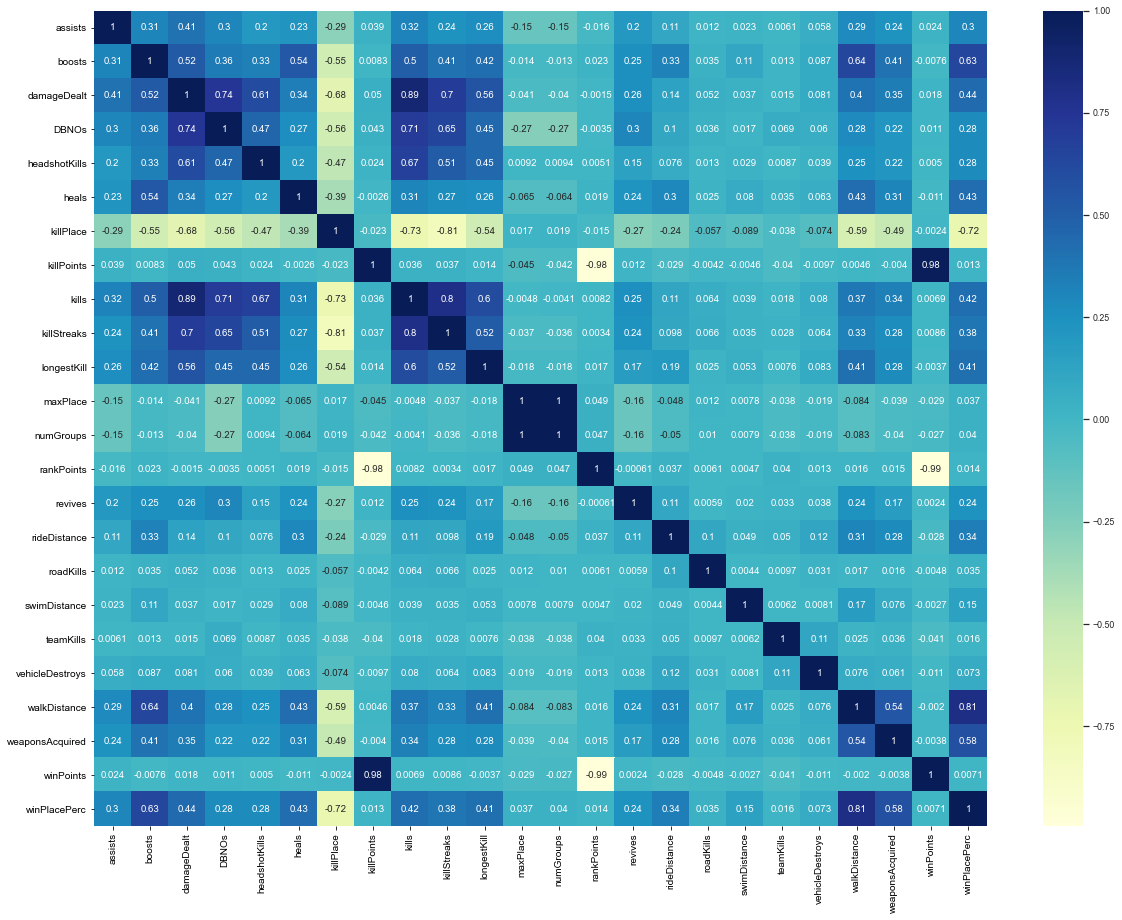

In [21]:
# Now we see the correlation between the variable in the dataset using HeatMaps
fig,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=0.8)
ax=sns.heatmap(train_new1.corr(),annot=True,cmap='YlGnBu')

Inferences that can be drawn the above heatmap are as follows:

- `killPoints` and `winPoints` are highly correlated with each other having the correlation coefficient of 0.98.
- `walkDistance` and `winPlacePerc` are strongly correlated having the correlation coefficient of 0.81.
- `kills` and `killStreaks` are strongly correlated having the correlation coefficient of 0.80.
-  `kills` and `damageDealth` are strongly correlated with the correlation coefficient - of 0.89.


### Let plot some graph based on the correlation matrix to see that whether the two variables has linear relationship.   


<AxesSubplot:xlabel='killPoints', ylabel='winPoints'>

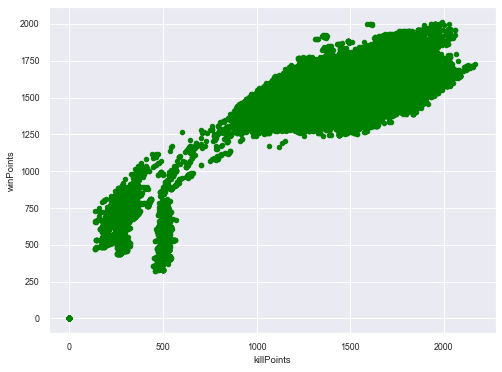

In [29]:
# Between winPoints and killPoints 
var = 'winPoints'
data_var = pd.concat([train_new1['killPoints'], train_new1[var]], axis=1)

data_var.plot.scatter(x='killPoints', y=var,figsize=(8,6),color='green')

From above graphs we can extract some important information:
- As the player have more `killPoints` then the `winPlacePerc` is also increases linearly.
- It means that they are strongly impact on the target variable.

<AxesSubplot:xlabel='killStreaks', ylabel='kills'>

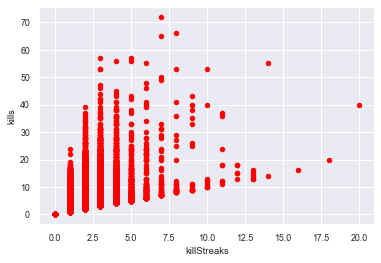

In [30]:
# Between kills and killStreaks 

train_new1.plot(kind='scatter',x='killStreaks', y='kills',color='red')
 

Text(0.5, 1.0, 'The relationship between winning and walking')

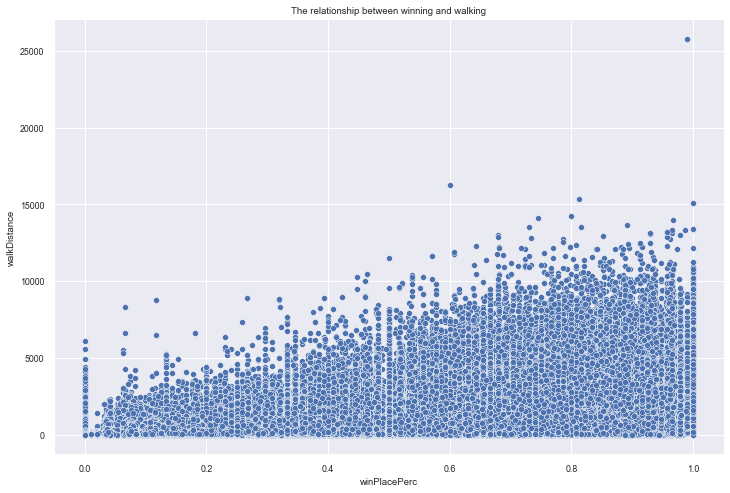

In [31]:
# between  walkDistance and winPlacePerc
plt.figure(figsize=(12,8))
sns.scatterplot(x='winPlacePerc',y='walkDistance',data=train)

plt.title('The relationship between winning and walking')

Text(0.5, 1.0, 'The relationship between winning and killing')

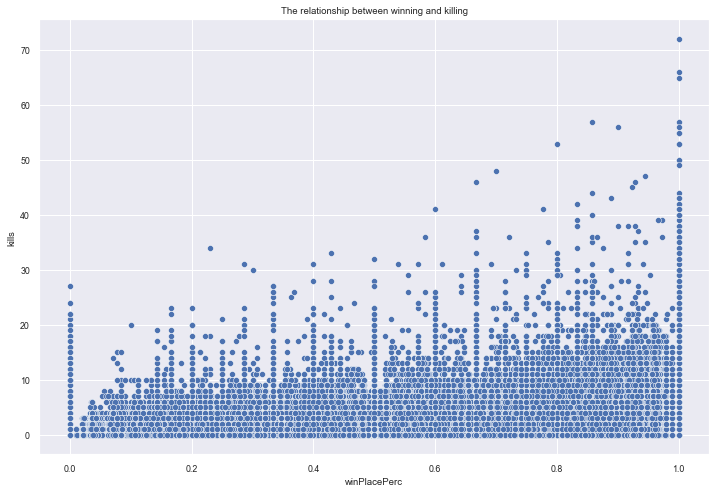

In [32]:
# between kills and winPlacePerc
plt.figure(figsize=(12,8))
sns.scatterplot(x='winPlacePerc',y='kills',data=train)

plt.title('The relationship between winning and killing')



From above graphs we can extract some important information:
1. MORE THE NUMBER OF `kills` and `walkDistance` MORE IS THE `WINNING PERCENTAGE` OF THE PLAYERS.
2. We can also say that the player have higher chance to be in top list even if he has less kill.
3. They are also linearly dependent on each other
  i.e, kill increases then winPlacePerc also increases.

## Let do some more analysis on different features with respect to target variable.
1. Analysis of Kills
2. Analysis of walking Distance
3. Analysis of rideDistance
4. Analysis of healing and boosting


## 1. Analysis of Kills :


In [22]:
print("Maximum kill {:.4f} by a single Players in a match. ".format(train_new1['kills'].max()))
print('-------------------------------------------------------------------------------------')
print("On an Average a player has {} kills in any match. ".format(train_new1['kills'].mean()))
print('----------------------------------------------------------------------------------------')
print("75 % of player has less or equal to {} kills in any match. ".format(train_new1['kills'].quantile(0.75)))

Maximum kill 72.0000 by a single Players in a match. 
-------------------------------------------------------------------------------------
On an Average a player has 0.9247835321393355 kills in any match. 
----------------------------------------------------------------------------------------
75 % of player has less or equal to 1.0 kills in any match. 


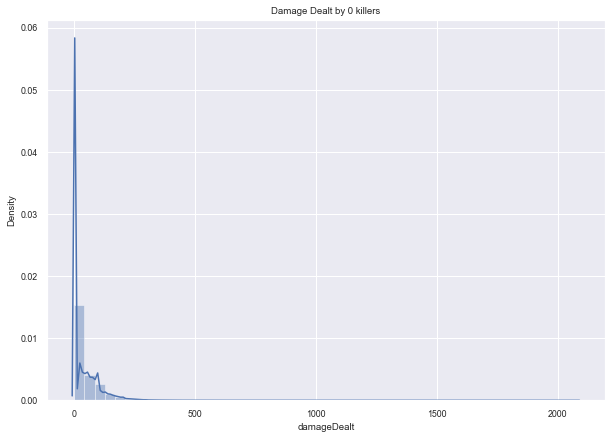

In [34]:
data = train_new1.copy()
data = dat
a[data['kills']==0]
plt.figure(figsize=(10,7))
plt.title("Damage Dealt by 0 killers")
sns.distplot(data['damageDealt'])
plt.show()

In [37]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(train_new1[train_new1['winPlacePerc']==1]), 100*len(train_new1[train_new1['winPlacePerc']==1])/len(train_new1)))

print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(train_new1[train_new1['winPlacePerc']==1]), 100*len(train_new1[train_new1['winPlacePerc']==1])/len(train_new1)))

A total of 127573 players (2.8688%) have won without a single kill!
A total of 127573 players (2.8688%) have won without dealing damage!


#### Effect of Killing on Winning percentage.

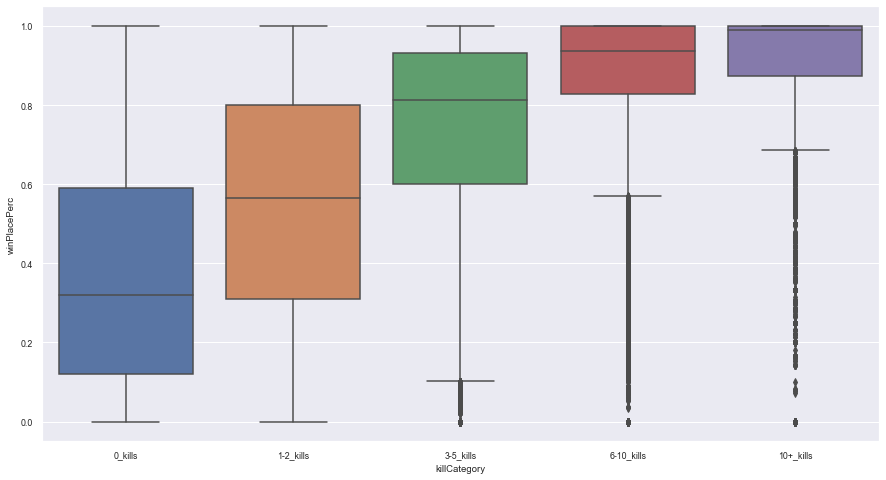

In [38]:
# Effect of Killing on Winning percentage
import pandas as pd
kills=train_new1.copy()
kills['killCategory'] = pd.cut(kills['kills'],[-1,0,2,5,10,60],labels=['0_kills','1-2_kills','3-5_kills','6-10_kills','10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killCategory',y='winPlacePerc',data=kills)
plt.show()

- From the above graph we can see that kills are strongly correlated with winning percentage.
- We also see that there are many outliers who have more than 10 kills.
- From the above graph we can see that **more the number of kills more is the winning percenatge**.
- This graph also means that there is a **huge correlation between `number of kills`  and `winPlacePerc`**

## 2. Analysing of Walking Distance

In [39]:
print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(train_new1[train_new1['walkDistance'] == 0]),
100*len(train_new1[train_new1['walkDistance']==0])/len(train_new1)))

99602 players (2.2398%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


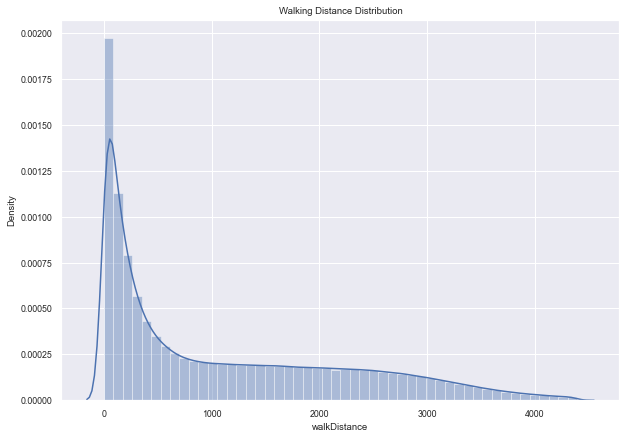

In [40]:
data = train_new1[train_new1['walkDistance'] < train_new1['walkDistance'].quantile(0.99)]
plt.figure(figsize=(10,7))
plt.title("Walking Distance Distribution")
sns.distplot(data['walkDistance'])
plt.show()

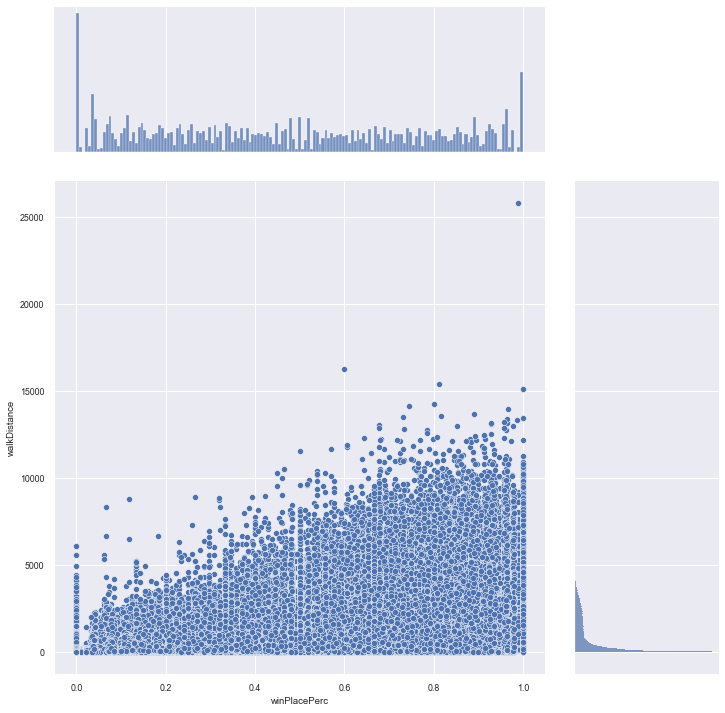

In [41]:
# Joint Plot :
# Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two 
# variables and describe their individual distributions on the same plot
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train_new1, height=10, ratio=3)
plt.show()

## 3. Analysis of rideDistance 

In [42]:
print("An average person drives for {:.1f}m, 99% of people have drived {} meter or 0 zero meter or less, while THE RIDER rode for {}m.".format(train_new1['rideDistance'].mean(), train_new1['rideDistance'].quantile(0.99), train_new1['rideDistance'].max()))

An average person drives for nanm, 99% of people have drived 6968.0 meter or 0 zero meter or less, while THE RIDER rode for 40704.0m.


## 4. Analysis of healing and boosting

In [23]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the maximun used is {}.".format(train_new1['heals'].mean(), train_new1['heals'].quantile(0.99), train['heals'].max()))
print('-----------------------------------------------------------------------------------------------------------------------------')
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the maximun used is {}.".format(train_new1['boosts'].mean(), train_new1['boosts'].quantile(0.99), train['boosts'].max()))

In the game on an average a person uses 1.4 heal items, 99% of people use 12.0 or less, while the maximun used is 80.
-----------------------------------------------------------------------------------------------------------------------------
In the game on an average a person uses 1.1 boost items, 99% of people use 7.0 or less, while the maximun used is 33.


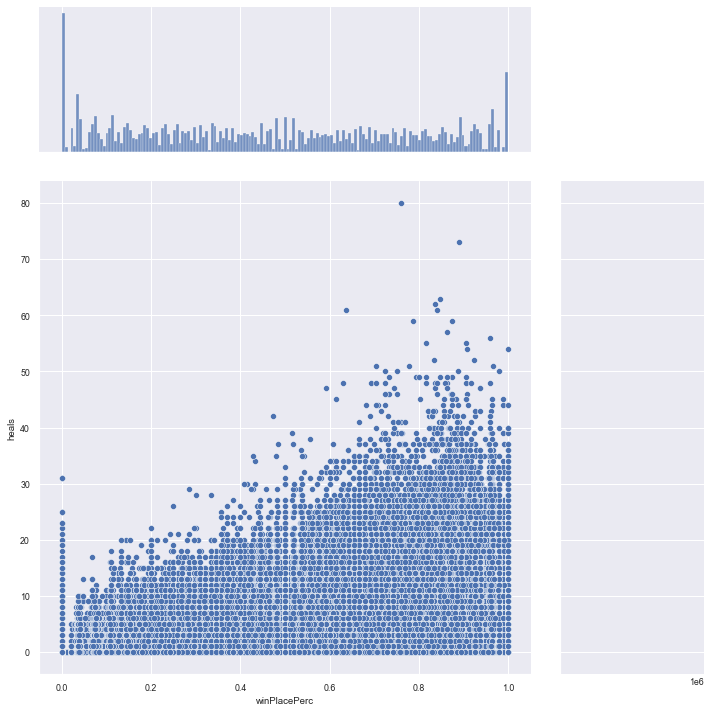

In [51]:
sns.jointplot(x="winPlacePerc", y="heals",  data=train_new1, height=10, ratio=3)
plt.show()

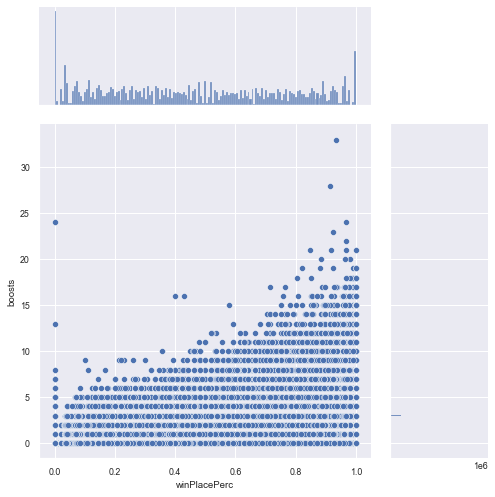

In [52]:
sns.jointplot(x="winPlacePerc", y="boosts",  data=train_new1, height=7, ratio=3)
plt.show()

In [57]:
# Let explore different count the number of match in each matchType.
train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

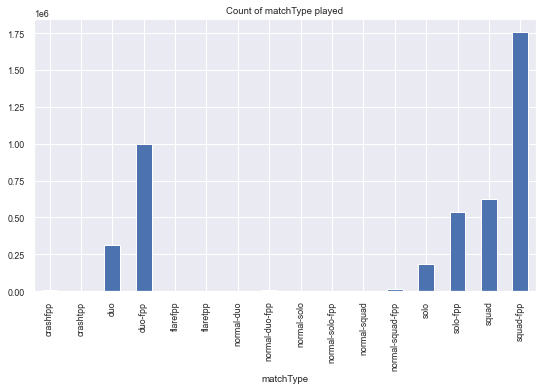

In [59]:
# Graph based on the matchType 
plt.figure(figsize=(9,5))
train_new1.groupby('matchType')['winPlacePerc'].agg('count').plot.bar();
plt.title("Count of matchType played");

From the above graph we can see that :
- Since in `squad` there are more than 1 person in a squad So the players has higher chance of winning the game.
-  In `squad` match the `winPlacePerc` is higher





Let see how much matches have been played overall.

In [24]:
train_new1.matchType.value_counts().to_dict()

{'squad-fpp': 1756186,
 'duo-fpp': 996691,
 'squad': 626526,
 'solo-fpp': 536761,
 'duo': 313591,
 'solo': 181943,
 'normal-squad-fpp': 17174,
 'crashfpp': 6287,
 'normal-duo-fpp': 5489,
 'flaretpp': 2505,
 'normal-solo-fpp': 1682,
 'flarefpp': 718,
 'normal-squad': 516,
 'crashtpp': 371,
 'normal-solo': 326,
 'normal-duo': 199}

In [ ]:
# # There classify the matchType into 3 types: Solo, Duo, Squad
# mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'squad'

In [25]:
# Now we analyze the kills
print("Skewness of kills is : " ,train_new1['kills'].skew())
print("Skewness of heals is : " ,train_new1['heals'].skew())
print("Skewness of boosts is : " ,train_new1['boosts'].skew())
print("Skewness of heals is : " ,train_new1['heals'].skew())
print("Skewness of boosts is : " ,train_new1['boosts'].skew())


Skewness of kills is :  3.362906563951854
Skewness of heals is :  3.44434457474588
Skewness of boosts is :  1.949958286692949
Skewness of heals is :  3.44434457474588
Skewness of boosts is :  1.949958286692949


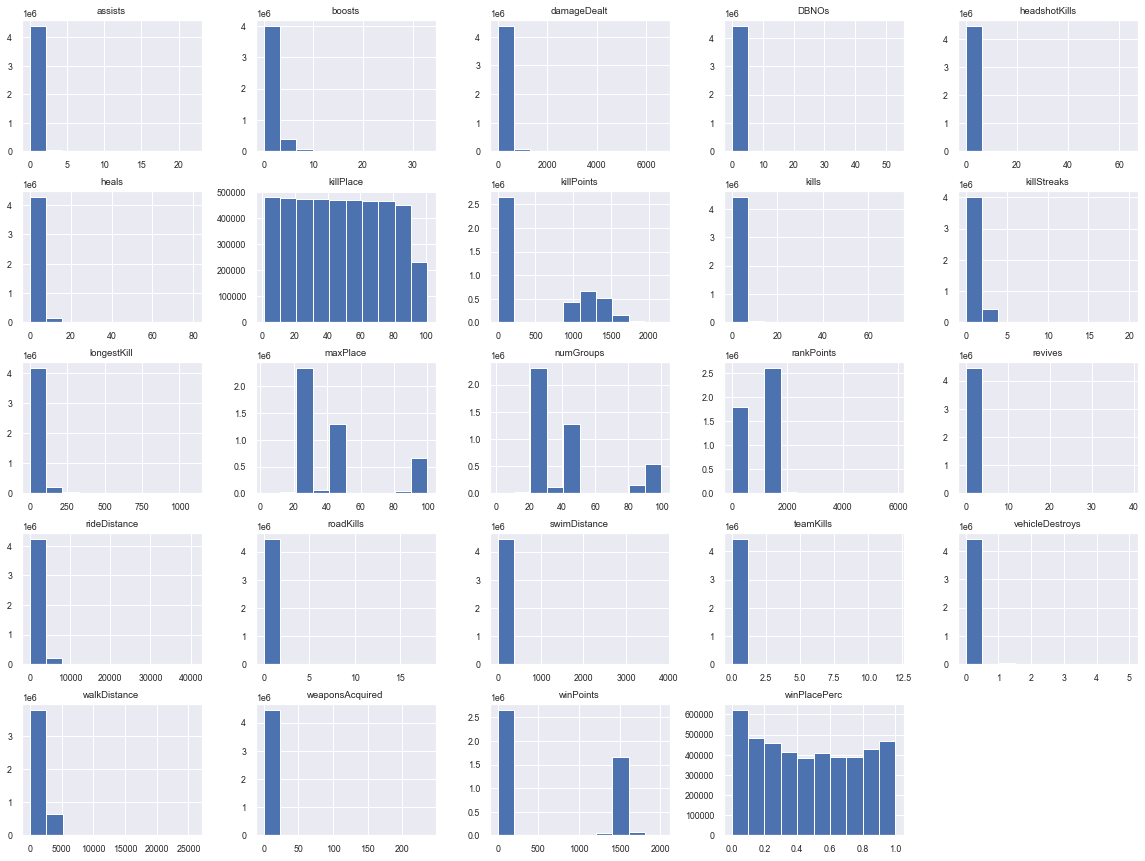

In [65]:
train_new1.hist(figsize=(20,15))
plt.show()

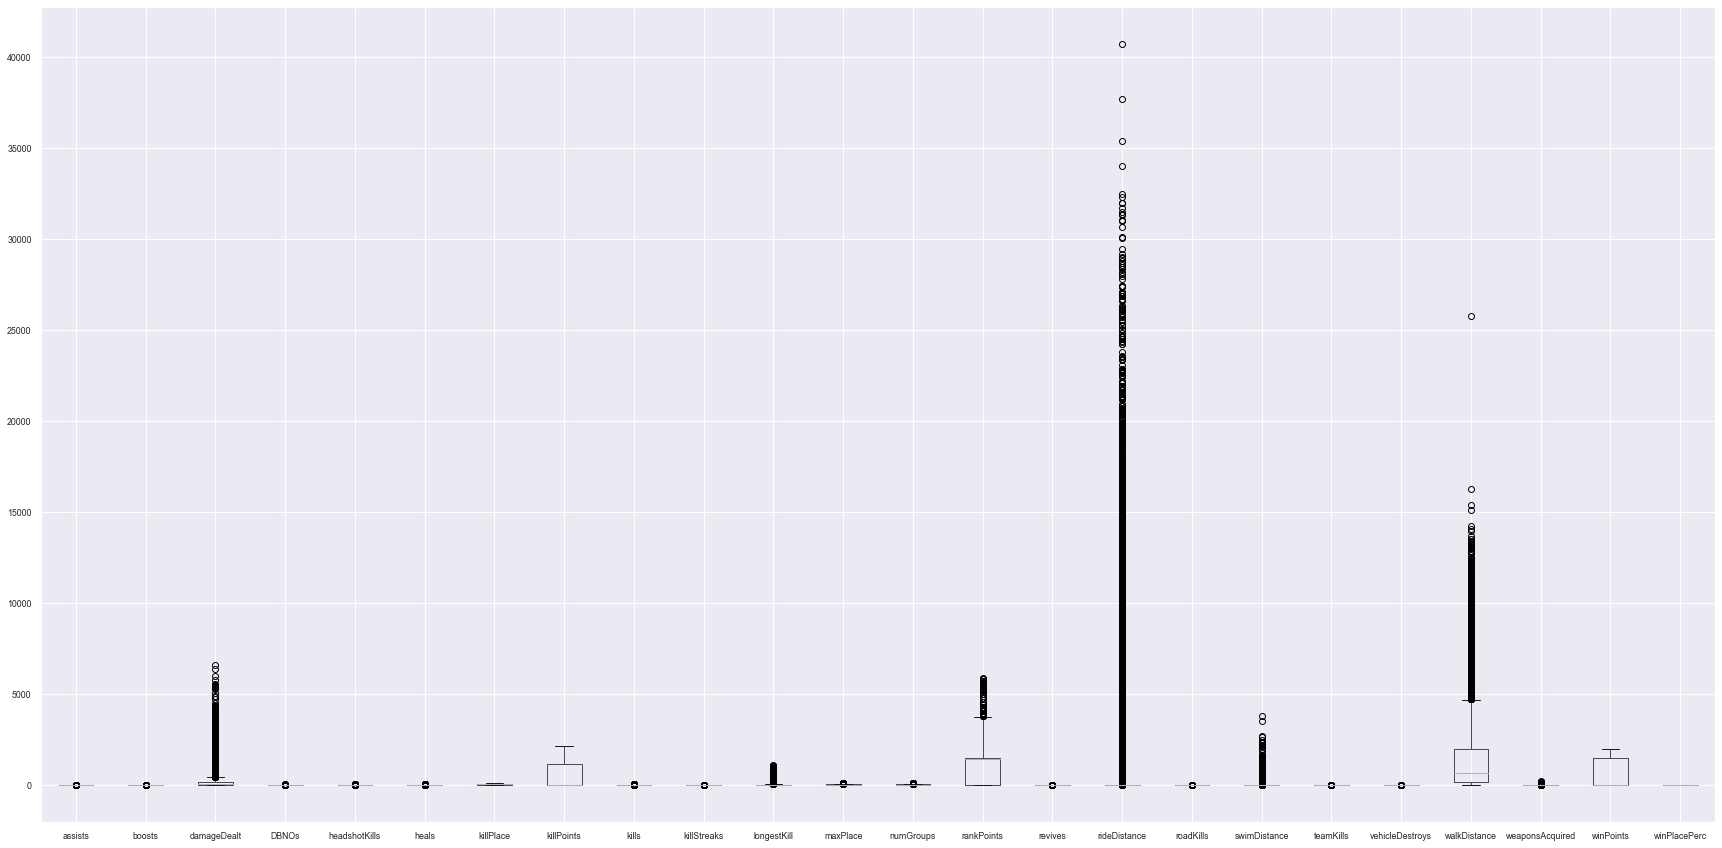

In [66]:
train_new1.boxplot(figsize=(30,15))
plt.show()

# Part 2: Data Cleaning: Outlier Detection and Removal - Finding the fraudsters

In [28]:
# Let add some features to the dataset
tr_data = train_new1.copy()
tr_data['healthItems'] = tr_data['boosts']+tr_data['heals']
tr_data['total_distance'] = tr_data['swimDistance'] + tr_data['rideDistance'] +tr_data['walkDistance']
test_new['healthItems'] = test_new['boosts']+test_new['heals']
test_new['total_distance'] = test_new['swimDistance'] + test_new['rideDistance'] + test_new['walkDistance']

In [29]:
tr_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance
0,0,0,0.00000,0,0,0,60,1241,0,0,...,0,0.000000,0,0,244.75,1,1466,0.444336,0,244.75
1,0,0,91.50000,0,0,0,57,0,0,0,...,0,11.039062,0,0,1434.00,5,0,0.640137,0,1445.00
2,1,0,68.00000,0,0,0,47,0,0,0,...,0,0.000000,0,0,161.75,2,0,0.775391,0,161.75
3,0,0,32.90625,0,0,0,75,0,0,0,...,0,0.000000,0,0,202.75,3,0,0.166748,0,202.75
4,0,0,100.00000,0,0,0,45,0,1,1,...,0,0.000000,0,0,49.75,2,0,0.187500,0,49.75


In [30]:
test_new.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,healthItems,total_distance
0,0,0,51.46875,0,0,0,73,0,0,0,...,0.0,0,0.0,0,0,588.0,1,0,0,588.0
1,0,4,179.12500,0,0,2,11,0,2,1,...,4668.0,0,0.0,0,0,2017.0,6,0,6,6684.0
2,1,0,23.40625,0,0,4,49,0,0,0,...,0.0,0,0.0,0,0,788.0,4,0,4,788.0
3,0,0,65.50000,0,0,0,54,0,0,0,...,0.0,0,0.0,0,0,1812.0,3,0,0,1812.0
4,0,4,330.25000,1,2,1,7,0,3,1,...,0.0,0,0.0,0,0,2964.0,4,0,5,2964.0


Creating a new feature `headshot_rate`. We see that the most players score in the `0 to 10% region`. However, there are a few anomalies that have a headshot_rate of `100% percent with more than 9 kills.`

In [31]:
# Add features like headshot_rate feature (headshots made per kill) 

tr_data['headshot_rate'] = tr_data['headshotKills'] / tr_data['kills']
test_data =test_new.copy()
test_data['headshot_rate']= test_data['headshotKills'] / test_data['kills']

In [98]:
tr_data[['headshot_rate']]


,headshot_rate
0,NaN
1,NaN
2,NaN
3,NaN
4,0.0
...,...
4446961,NaN
4446962,NaN
4446963,NaN
4446964,0.5


In [32]:
# for train data
tr_data['headshot_rate'].fillna(0, inplace= True)
tr_data['headshot_rate'].replace(np.inf, 0, inplace=True)
# for test data
test_data['headshot_rate'].fillna(0, inplace= True)
test_data['headshot_rate'].replace(np.inf, 0, inplace=True)

In [33]:
tr_data[['headshot_rate']]

,headshot_rate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4446961,0.0
4446962,0.0
4446963,0.0
4446964,0.5


In [34]:
#Defining some functions for plotting graphs
def show_countplot(column):
    plt.figure(figsize=(15,4))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(15,5))
    sns.distplot(train[column],kde=True, bins=50)
    plt.show()

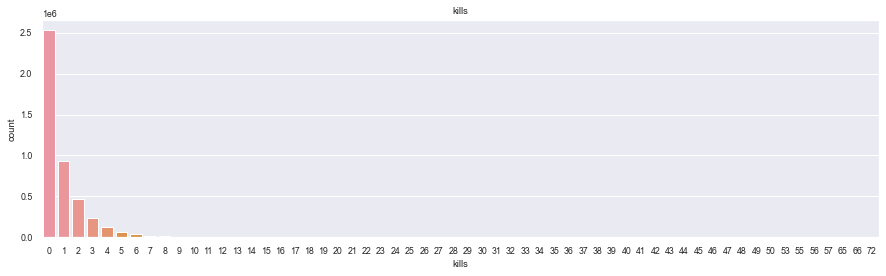

In [102]:
show_countplot('kills')


In [35]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?

tr_data[(tr_data['kills'] >= 40) & (tr_data['weaponsAcquired'] > 55) & (tr_data['total_distance'] < 100.0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance,headshot_rate
156599,21,0,5480.0,0,12,7,4,0,48,6,...,0.0,0,0,23.703125,61,0,0.700195,7,23.703125,0.250000
672993,10,0,5792.0,0,5,2,1,0,57,5,...,0.0,0,0,24.265625,56,0,1.000000,2,24.265625,0.087719
770454,12,0,5556.0,0,7,4,1,0,55,6,...,0.0,0,0,85.562500,66,0,1.000000,4,85.562500,0.127273
1378200,9,0,3708.0,0,5,1,5,0,41,4,...,0.0,0,0,46.718750,72,0,0.777832,1,46.718750,0.121951


In [36]:
# Is it even possible to kill more than 40 people without using any heals?
tr_data[(tr_data['kills'] >= 40) & (tr_data['heals'] == 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance,headshot_rate
160254,1,0,4032.0,0,40,0,1,1000,42,5,...,0.0,1,0,718.500,16,1500,1.0,0,718.500,0.952381
2105633,8,0,4272.0,40,34,0,1,0,43,9,...,0.0,0,0,80.375,21,0,1.0,0,80.375,0.790698
2316123,8,0,4104.0,31,3,0,1,0,40,6,...,0.0,0,0,1282.000,22,0,1.0,0,1282.000,0.075000
2601666,5,0,4348.0,0,31,0,1,0,53,8,...,0.0,0,0,134.250,36,0,1.0,0,134.250,0.584906
3924729,1,2,3680.0,0,35,0,1,1000,40,20,...,0.0,0,0,1180.000,2,1500,1.0,2,1180.000,0.875000


In [37]:
# Drop 'fraudsters' from above df
tr_data.drop(tr_data[(tr_data['kills'] >= 40) & (tr_data['heals'] == 0)].index, inplace=True)
tr_data.drop(tr_data[(tr_data['kills'] >= 40) & (tr_data['weaponsAcquired'] > 55) & (tr_data['total_distance'] < 100.0)].index,inplace=True)

### It is also possible that the player without moving have some kills.This will act as a outliers.So we have to remove this also.

In [38]:
tr_data[(tr_data['kills'] > 0) & (tr_data['total_distance'] == 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance,headshot_rate
1824,0,0,593.000000,0,0,3,18,0,6,3,...,0.0,0,0,0.0,8,0,0.856934,3,0.0,0.000000
6673,2,0,346.500000,0,0,6,33,0,3,1,...,0.0,0,0,0.0,22,0,0.600098,6,0.0,0.000000
11892,2,0,1750.000000,0,4,5,3,0,20,6,...,0.0,0,0,0.0,13,0,0.894531,5,0.0,0.200000
14631,0,0,157.750000,0,0,0,69,1000,1,1,...,0.0,0,0,0.0,7,1500,0.000000,0,0.0,0.000000
15591,0,0,100.000000,0,1,0,37,0,1,1,...,0.0,0,0,0.0,10,0,0.300049,0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,0,0,4.316406,0,0,0,61,1000,1,1,...,0.0,0,0,0.0,7,1500,0.888672,0,0.0,0.000000
4440898,0,0,90.812500,0,0,4,42,0,1,1,...,0.0,0,0,0.0,8,0,0.000000,4,0.0,0.000000
4440927,2,2,909.000000,7,2,16,26,1000,6,2,...,0.0,0,0,0.0,7,1500,0.600098,18,0.0,0.333333
4441511,6,2,696.500000,9,2,0,18,1000,9,2,...,0.0,1,0,0.0,16,1500,0.899902,2,0.0,0.222222


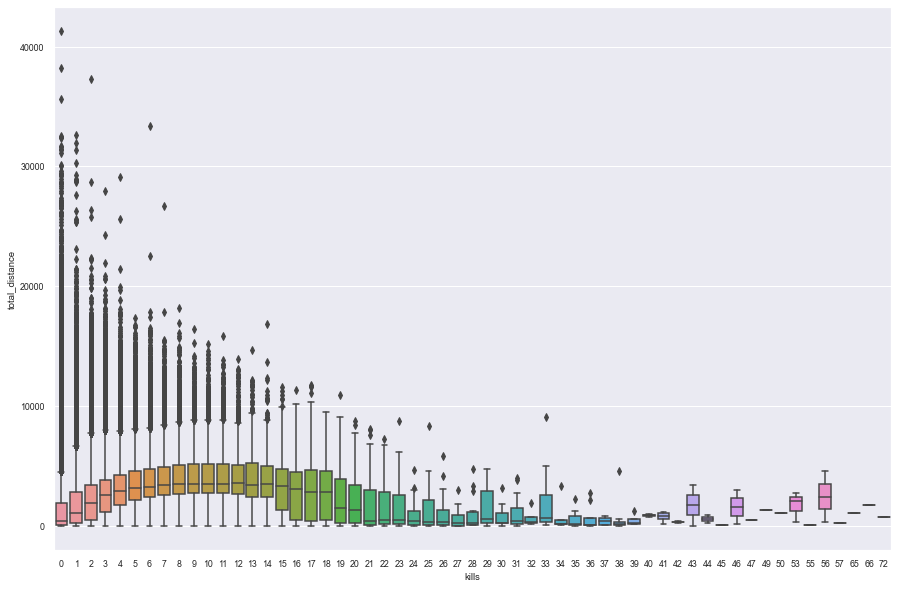

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x='kills',y='total_distance', data=tr_data)
plt.show()

- From the above graph we can see that there are many outliers.
- Many player do not move a distance and kill is more than zero 

In [41]:
# Droping the outliers
tr_data.drop(tr_data[(tr_data['kills'] > 0) & (tr_data['total_distance'] == 0)].index,inplace=True)

In [42]:
# players who took these shots from more than 1km or 10000 m
tr_data[tr_data['longestKill'] >= 1000]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance,headshot_rate
195021,1,4,784.00,5,4,5,4,1195,4,2,...,0.0000,0,0,3678.000000,5,1523,0.848633,9,9928.000000,1.000000
202281,0,3,784.00,5,1,1,5,0,4,3,...,0.0000,0,1,3052.000000,9,0,0.923340,4,3776.000000,0.250000
240005,5,0,1284.00,8,5,7,18,1000,11,2,...,0.0000,0,0,48.875000,38,1500,0.538574,7,48.875000,0.454545
324313,2,0,1028.00,0,0,0,9,0,10,2,...,0.0000,0,0,1264.000000,26,0,1.000000,0,2980.000000,0.000000
656553,6,0,1410.00,17,5,0,3,1000,16,4,...,0.0000,0,0,29.203125,30,1500,0.600098,0,29.203125,0.312500
803632,0,0,196.75,0,0,0,51,0,1,1,...,0.0000,0,0,1074.000000,22,0,0.000000,0,3158.000000,0.000000
895411,4,0,1012.00,11,5,0,5,0,10,3,...,0.0000,0,0,569.500000,18,0,0.909180,0,569.500000,0.500000
1172437,2,1,329.25,0,0,2,45,1000,3,1,...,0.0000,0,0,832.500000,9,1500,0.285645,3,832.500000,0.000000
1209416,0,6,1640.00,0,7,0,1,1000,15,2,...,0.0000,0,0,2848.000000,4,1500,0.941406,6,2848.000000,0.466667
1642712,3,2,2104.00,0,4,11,11,0,23,2,...,0.0000,0,0,235.250000,41,0,0.500000,13,235.250000,0.173913


In [43]:
# Droping these players
tr_data.drop(tr_data[tr_data['longestKill'] >= 1000].index, inplace=True)

#### Let create a function `outlier_deletion` to remove outliers.
#### Some of the outliers are:
1. Player with kill more than 29 and distance covered is less than 1000 
2. Player with distance travelled by vehicle is greater than 20 km.
3. Player with swim distance  is greater than 1 km
4. Player who has acquired weapons greater than 20.
5. Player who has acquired heals or boosts or healthItem greater than 20.

In [47]:
def outlier_deletion(data):
    data.drop(data[(data["kills"]>=29) & (data["total_distance"]<1000)].index,inplace =True)
    data.drop(data[data['rideDistance'] >= 20000].index, inplace=True)
    data.drop(data[data['swimDistance'] >= 1000].index, inplace=True)
    data.drop(data[data['weaponsAcquired'] >= 30 ].index, inplace=True)
    data.drop(data[data['heals'] >= 30].index, inplace=True)
    return data

In [48]:
outlier_deletion(tr_data)  # deleted the outliers

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance,headshot_rate
0,0,0,0.00000,0,0,0,60,1241,0,0,...,0.000000,0,0,244.7500,1,1466,0.444336,0,244.7500,0.0
1,0,0,91.50000,0,0,0,57,0,0,0,...,11.039062,0,0,1434.0000,5,0,0.640137,0,1445.0000,0.0
2,1,0,68.00000,0,0,0,47,0,0,0,...,0.000000,0,0,161.7500,2,0,0.775391,0,161.7500,0.0
3,0,0,32.90625,0,0,0,75,0,0,0,...,0.000000,0,0,202.7500,3,0,0.166748,0,202.7500,0.0
4,0,0,100.00000,0,0,0,45,0,1,1,...,0.000000,0,0,49.7500,2,0,0.187500,0,49.7500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00000,0,0,0,74,1029,0,0,...,0.000000,0,0,1019.0000,3,1507,0.178589,0,2312.0000,0.0
4446962,0,1,44.15625,0,0,0,69,0,0,0,...,0.000000,0,0,81.6875,6,0,0.293457,1,81.6875,0.0
4446963,0,0,59.06250,0,0,0,66,0,0,0,...,2.183594,0,0,788.5000,4,0,0.481445,0,790.5000,0.0
4446964,0,4,180.37500,1,1,2,11,0,2,1,...,0.000000,0,0,2748.0000,8,0,0.799805,6,2748.0000,0.5


In [49]:
# How is it even possible that a player is able to ride and kill without walking even a single meter ?
tr_data[(tr_data['walkDistance'] == 0) & (tr_data['rideDistance'] > 0) & (tr_data['kills'] > 0)]


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healthItems,total_distance,headshot_rate
219621,0,0,100.0000,1,0,0,38,0,1,1,...,0.0,0,0,0.0,0,0,0.000000,0,673.0000,0.0
1051447,0,0,102.1875,0,0,0,34,1320,1,1,...,0.0,0,0,0.0,0,1532,0.125000,0,1757.0000,0.0
1053213,1,0,100.0000,1,0,0,38,1621,1,1,...,0.0,0,0,0.0,0,1747,0.063782,0,36.2500,0.0
1166930,2,0,168.5000,1,0,0,45,1398,1,1,...,0.0,0,0,0.0,0,1499,0.066711,0,391.7500,0.0
1479750,0,0,100.0000,1,0,0,46,0,1,1,...,0.0,0,0,0.0,0,0,0.061188,0,468.2500,0.0
2221273,0,0,100.0000,1,0,0,37,0,1,1,...,0.0,0,0,0.0,0,0,0.152222,0,534.5000,0.0
2382410,0,0,100.0000,1,0,0,43,0,1,1,...,0.0,0,0,0.0,0,0,0.000000,0,262.7500,0.0
2471705,0,0,93.5000,1,0,0,38,0,1,1,...,0.0,0,0,0.0,0,0,0.142944,0,1360.0000,0.0
2907639,4,0,578.0000,0,0,6,30,0,3,1,...,0.0,0,0,0.0,29,0,0.399902,6,1277.0000,0.0
3778837,0,0,144.2500,2,0,0,20,1183,2,1,...,0.0,0,0,0.0,0,1496,0.000000,0,415.5000,0.0


In [50]:
tr_data.drop(tr_data[(tr_data['walkDistance'] == 0) & (tr_data['rideDistance'] > 0) & (tr_data['kills'] > 0)].index,inplace=True)

In [51]:
# What was the player doing in the game when total distance travelled by him/her is 0? 
tr_data[(tr_data['total_distance'] == 0)]
tr_data.drop(tr_data[(tr_data['total_distance'] == 0)].index,inplace=True)


# 3. Feature Selection 
## Using Correlation
- To select the best feature from the tr_data, we need to import the `train_test_split` from the `sklearn.feature_selection` class and apply it to the dataset.
- As we know that not all the features are important for Predicting the target variable.
- So we use Pearson Correlation method to select highly correlated features.


In [62]:
print("Number of columns in the old train data i.e, `train_new1` is ",train_new1.shape[1])
print("-----------------------------------------------------------------------------")
print("Number of rows in the old train data i.e, `train_new1` is ",train_new1.shape[0])
print("-----------------------------------------------------------------------------")
print("Number of columns in the new train data i.e, `tr_data` is ",tr_data.shape[1])
print("-----------------------------------------------------------------------------")
print("Number of rows in the new train data i.e, `tr_data` is ",tr_data.shape[0])
print("-----------------------------------------------------------------------------")


Number of columns in the old train data i.e, `train_new1` is  25
-----------------------------------------------------------------------------
Number of rows in the old train data i.e, `train_new1` is  4446965
-----------------------------------------------------------------------------
Number of columns in the new train data i.e, `tr_data` is  28
-----------------------------------------------------------------------------
Number of rows in the new train data i.e, `tr_data` is  4347458
-----------------------------------------------------------------------------


In [63]:
train_df = tr_data.copy()
train_df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'healthItems', 'total_distance', 'headshot_rate'],
      dtype='object')

# One-hot encoding

In [94]:
df_train= pd.get_dummies(train_df, columns=['matchType'])
df_test=  pd.get_dummies(test_data, columns=['matchType'])

In [96]:
df_train.shape

(4347458, 43)

In [97]:
df_test.shape

(1934174, 42)

In [98]:
X = df_train.drop('winPlacePerc',axis=1)
y = df_train['winPlacePerc']

In [99]:
df_train.shape

(4347458, 43)

In [100]:
X.shape

(4347458, 42)

## Split the data 

In [101]:
# Now let’s split the data into training and test datasets. I will split the data into 70% training and 30% testing:

import sklearn 
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                                y,
                                              test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((3043220, 42), (1304238, 42))

In [103]:
# with the following function we can select the highly correlated feature
# it will remove the first features that is correlated
def correlation(data,threshold):
    col_corr=set()  # set of all name of correlated features
    corr_matrix =data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [105]:
corr_features = correlation(X_train,0.5)
print("Number of Highly Correlated Features :",len(set(corr_features)))

Number of Highly Correlated Features : 15


# Applying machine learning algorithms:

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                                y,
                                              test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((3043220, 42), (1304238, 42))

- Now we've got our data split into training and test sets, it's time to build a machine learning model.
- We'll train it (find the patterns) on the training set.
- And we'll test it (use the patterns) on the test set.



##  Random Forest regressor:
- The `RandomForestRegressor` class of the `sklearn.ensemble` library is used to solve regression problems via random forest. 
- The most important parameter of the `RandomForestRegressor class` is the n_estimators parameter. 
- This parameter defines the number of trees in the random forest. We will start with `n_estimator=40` to see how our algorithm performs. 
- Now, I will train a machine learning model for the task of winning place percentage prediction. I will use the random forest regression algorithm. 


In [110]:
# Defining function for calculating Mean Absolute Error (MAE)

# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Function to print the MAE (Mean Absolute Error) score

def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_test), y_test)]
    #Score of the training dataset obtained using an out-of-bag estimate.
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)


In [111]:
# Train basic model
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
m1.fit(X_train, y_train)

print_score(m1)

['mae train: ', 0.047001461562814664, 'mae val: ', 0.0658869593667466]


In [118]:
from sklearn import metrics
y_pred = m1.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.008268136863035803
Root Mean Squared Error: 0.09092929595590082


- With 40 trees, the Mean Absolute Error is  0.0658869593667466.But if we increase the n_estimators we may get the better score.
- Let check with 50 tree .


In [132]:
m1 = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print_score(m1)


Mean Squared Error: 0.008262187827269972
Root Mean Squared Error: 0.09089657764333028
['mae train: ', 0.04686238347113419, 'mae val: ', 0.06568872076554264]


- With 50 trees, the Mean Absolute Error is   0.06568802607833034 which is less than previous value.
- This indicate, among other things, that we should not always use more estimators (trees).
